<a href="https://colab.research.google.com/github/generacionmovil/ocupacion/blob/main/Codigo_Ciclo_For_para_todas_las_celdas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paquetes

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.6MB/s 
     |████████████████████████████████| 9.5MB 22.4MB/s 
     |████████████████████████████████| 2.1MB 37.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
import logging
import numpy as np

In [ ]:
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For Arima
import pmdarima
import statsmodels.tsa.api as smt
## For Lstm
from tensorflow.keras import models, layers, preprocessing as kprocessing
## For Prophet
from fbprophet import Prophet

#Tratamiento base de datos





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dtf = pd.read_csv("/content/drive/My Drive/colab bases/Consolidado General 11_2018-06_2020.csv", encoding='latin1', delimiter=';')
dtf.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12,14) have mixed types.Specify dtype option on import or set low_memory=False.



,Id Registro,Operador ingreso,Operador salida,Codigo Zona,Placa,Tipo vehículo,Fecha ingreso,Hora ingreso,Fecha salida,Hora salida,Impulsador TR,Fecha TR,Total minutos,Valor,Num. Factura,Tarifa,Estado factura
0,5810628,EDER ECHEVERRY GALEANO,EDER ECHEVERRY GALEANO,EL ABUELO Y SON & SORBO,EHL999,Automoviles,2018-11-01 07:01:53,07:01:53,2018-11-01 07:14:47,07:14:47,NaN,NaN,0h 12m 54s,800,NaN,CARRO ZER CALDAS,Tiquete pago
1,5810635,EDER ECHEVERRY GALEANO,EDER ECHEVERRY GALEANO,EL ABUELO Y SON & SORBO,FCY730,Automoviles,2018-11-01 07:02:23,07:02:23,2018-11-01 18:25:24,18:25:24,NaN,NaN,11h 23m 1s,36800,NaN,CARRO ZER CALDAS,Tiquete pago
2,5822823,EDER ECHEVERRY GALEANO,EDER ECHEVERRY GALEANO,EL ABUELO Y SON & SORBO,HNV201,Automoviles,2018-11-01 07:35:28,07:35:28,2018-11-01 18:49:40,18:49:40,NaN,NaN,11h 14m 12s,36000,NaN,CARRO ZER CALDAS,Tiquete pago
3,5811677,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,WUX03C,Motos,2018-11-01 07:46:34,07:46:34,2018-11-01 12:12:11,12:12:11,NaN,NaN,4h 25m 37s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
4,5811679,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,ZHA49A,Motos,2018-11-01 07:48:15,07:48:15,2018-11-01 20:58:34,20:58:34,NaN,NaN,13h 10m 19s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago


In [ ]:
print(list(dtf.columns))

['Id Registro', 'Operador ingreso', 'Operador salida', 'Codigo Zona', 'Placa', 'Tipo vehículo', 'Fecha ingreso', 'Hora ingreso', 'Fecha salida', 'Hora salida', 'Impulsador TR', 'Fecha TR', 'Total minutos', 'Valor', 'Num. Factura', 'Tarifa', 'Estado factura']


In [ ]:
##Escoger zona a filtrar
dtf=dtf[dtf['Codigo Zona']=='FULLHOGAR']
dtf.head()

,Id Registro,Operador ingreso,Operador salida,Codigo Zona,Placa,Tipo vehículo,Fecha ingreso,Hora ingreso,Fecha salida,Hora salida,Impulsador TR,Fecha TR,Total minutos,Valor,Num. Factura,Tarifa,Estado factura
3,5811677,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,WUX03C,Motos,2018-11-01 07:46:34,07:46:34,2018-11-01 12:12:11,12:12:11,NaN,NaN,4h 25m 37s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
4,5811679,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,ZHA49A,Motos,2018-11-01 07:48:15,07:48:15,2018-11-01 20:58:34,20:58:34,NaN,NaN,13h 10m 19s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
5,5811680,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,HBG80D,Motos,2018-11-01 07:51:18,07:51:18,2018-11-01 20:58:09,20:58:09,NaN,NaN,13h 6m 51s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
6,5811678,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,MBG26C,Motos,2018-11-01 07:51:58,07:51:58,2018-11-01 12:17:22,12:17:22,NaN,NaN,4h 25m 24s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
7,5811681,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,PIX35E,Motos,2018-11-01 07:52:37,07:52:37,2018-11-01 20:58:23,20:58:23,NaN,NaN,13h 5m 46s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago


In [ ]:
##Escoger tipo de vehiculo
dtf=dtf[dtf['Tipo vehículo']=='Motos']
dtf.head()

,Id Registro,Operador ingreso,Operador salida,Codigo Zona,Placa,Tipo vehículo,Fecha ingreso,Hora ingreso,Fecha salida,Hora salida,Impulsador TR,Fecha TR,Total minutos,Valor,Num. Factura,Tarifa,Estado factura
3,5811677,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,WUX03C,Motos,2018-11-01 07:46:34,07:46:34,2018-11-01 12:12:11,12:12:11,NaN,NaN,4h 25m 37s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
4,5811679,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,ZHA49A,Motos,2018-11-01 07:48:15,07:48:15,2018-11-01 20:58:34,20:58:34,NaN,NaN,13h 10m 19s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
5,5811680,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,HBG80D,Motos,2018-11-01 07:51:18,07:51:18,2018-11-01 20:58:09,20:58:09,NaN,NaN,13h 6m 51s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
6,5811678,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,MBG26C,Motos,2018-11-01 07:51:58,07:51:58,2018-11-01 12:17:22,12:17:22,NaN,NaN,4h 25m 24s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
7,5811681,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,PIX35E,Motos,2018-11-01 07:52:37,07:52:37,2018-11-01 20:58:23,20:58:23,NaN,NaN,13h 5m 46s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago


In [ ]:
##Limpieza
dtf=dtf[['Fecha ingreso','Fecha salida']]
dtf.head()

,Fecha ingreso,Fecha salida
3,2018-11-01 07:46:34,2018-11-01 12:12:11
4,2018-11-01 07:48:15,2018-11-01 20:58:34
5,2018-11-01 07:51:18,2018-11-01 20:58:09
6,2018-11-01 07:51:58,2018-11-01 12:17:22
7,2018-11-01 07:52:37,2018-11-01 20:58:23


In [ ]:
dtf["Fecha ingreso"] = pd.to_datetime(dtf['Fecha ingreso'], format='%Y-%m-%d %H:%M:%S')
dtf["Fecha salida"] = pd.to_datetime(dtf['Fecha salida'], format='%Y-%m-%d %H:%M:%S')
dtf.head()

,Fecha ingreso,Fecha salida
3,2018-11-01 07:46:34,2018-11-01 12:12:11
4,2018-11-01 07:48:15,2018-11-01 20:58:34
5,2018-11-01 07:51:18,2018-11-01 20:58:09
6,2018-11-01 07:51:58,2018-11-01 12:17:22
7,2018-11-01 07:52:37,2018-11-01 20:58:23


In [ ]:
dtfI=pd.DataFrame()
dtfI['Fecha']=dtf['Fecha ingreso']
dtfI['conteo']=1
dtfI.set_index('Fecha',inplace=True)
dtfI.head()

,conteo
Fecha,
2018-11-01 07:46:34,1
2018-11-01 07:48:15,1
2018-11-01 07:51:18,1
2018-11-01 07:51:58,1
2018-11-01 07:52:37,1


In [ ]:
dtfS=pd.DataFrame()
dtfS['Fecha']=dtf['Fecha salida']
dtfS['conteo']=-1
dtfS.set_index('Fecha',inplace=True)
dtfS.head()

,conteo
Fecha,
2018-11-01 12:12:11,-1
2018-11-01 20:58:34,-1
2018-11-01 20:58:09,-1
2018-11-01 12:17:22,-1
2018-11-01 20:58:23,-1


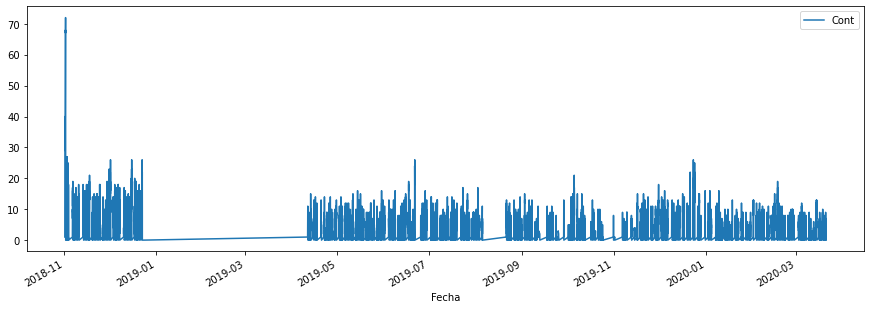

In [ ]:
dt=pd.concat([dtfI,dtfS])
dt.sort_index(inplace=True)
dt['Cont']=dt['conteo'].cumsum()
dt=dt[['Cont']]
dt.plot(figsize=(15,5))


In [ ]:
dt.head()

,Cont
Fecha,
2018-11-01 07:46:34,1
2018-11-01 07:48:15,2
2018-11-01 07:51:18,3
2018-11-01 07:51:58,4
2018-11-01 07:52:37,5


#Pasar datos a un excel

In [ ]:
#Data ocuapción por registros
import pandas as pd

toexcl = dt.reset_index()

toexcl.to_excel ('/content/Data.xlsx', index = False, header=True)

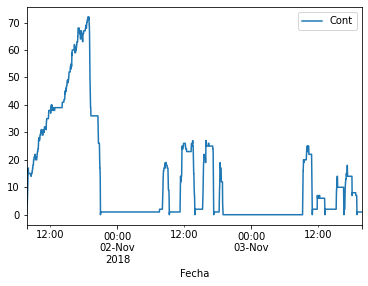

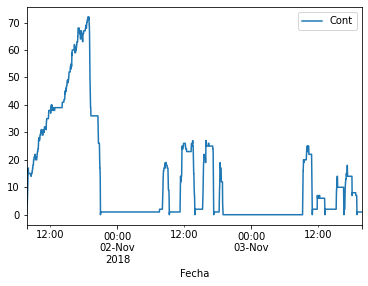

In [ ]:
#Data ocupacion por minutos
#Transformar base a minutos
toexclmin=dt.copy()
toexclmin=toexclmin.resample('T').last().bfill()
toexclmin.iloc[:3600,:].plot()
#a excel


toexclmin.to_excel ('/content/Data.xlsx', index = False, header=True)
toexclmin.iloc[:3600,:].plot()

#Visualización

In [ ]:
#Usar en caso de querer cargar una nueva base de datos
# format datetime column
#dtf["date"] = pd.to_datetime(dtf['Fecha'], format='%d.%m.%Y')
## create time series#
##ts = dtf.groupby("date")["Ocupación"].sum().rename("ocupa")
#ts.head()

In [ ]:
#ts.tail()

date
2020-03-20 16:53:05    4.0
2020-03-20 16:58:57    3.0
2020-03-20 17:11:08    2.0
2020-03-20 17:33:49    1.0
2020-03-20 17:37:22    0.0
Name: ocupa, dtype: float64

In [ ]:
##print("population --> len:", len(ts), "| mean:", round(ts.mean()), " | std:", round(ts.std()))
#w = 30
#print("moving --> len:", w, " | mean:", round(ts.ewm(span=w).mean()[-1]), " | std:", round(ts.ewm(span=w).std()[-1]))

population --> len: 31494 | mean: 7  | std: 6
moving --> len: 30  | mean: 4.0  | std: 2.0


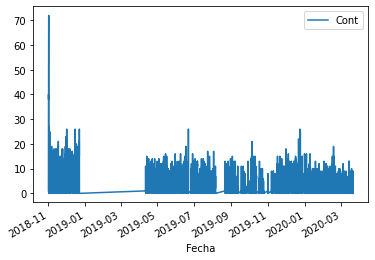

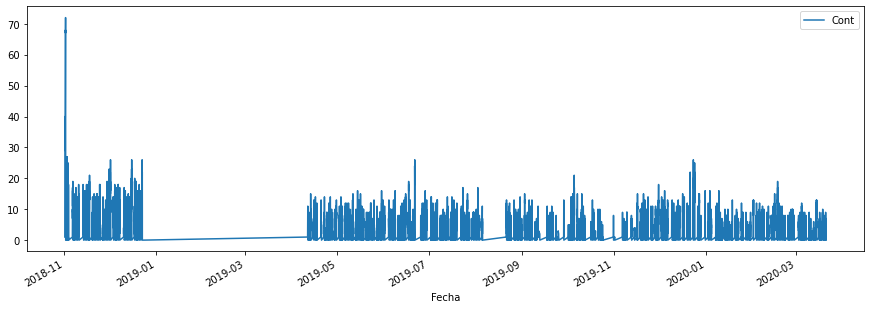

In [ ]:
from matplotlib import pyplot
dt.plot()
dt.plot(figsize=(15,5))
pyplot.show()

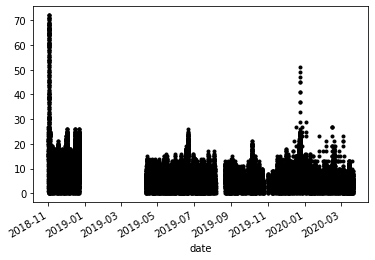

In [ ]:
dt.plot(style='k.')


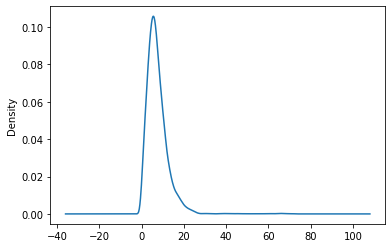

In [ ]:
dt.plot(kind='kde')
pyplot.show()

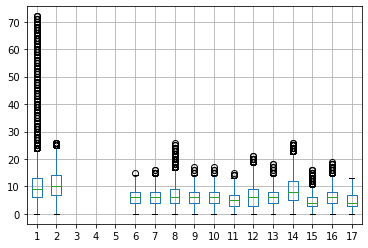

In [ ]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
groups = dt.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,18)
months.boxplot()
pyplot.show()

#PyTorch Data Clima

```
# Esto tiene formato de código**
```




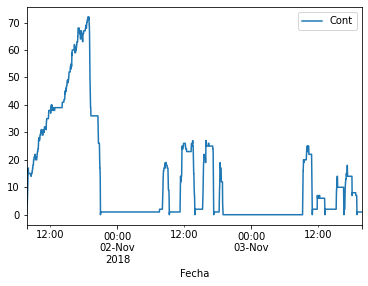

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()

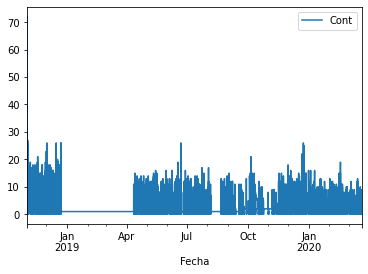

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.plot()

In [ ]:
dtmin['diasem']=dtmin.index.to_series().dt.dayofweek
dtmin.tail()

,Cont,diasem
Fecha,,
2020-03-20 17:33:00,1.0,4
2020-03-20 17:34:00,0.0,4
2020-03-20 17:35:00,0.0,4
2020-03-20 17:36:00,0.0,4
2020-03-20 17:37:00,0.0,4


In [ ]:
##Incluir festivos
Fest = pd.read_excel('/content/drive/My Drive/colab bases/festivosCol2018-2020.xlsx')
Fest['Festivos']=pd.to_datetime(Fest['Festivos'])
Fest.dtypes


Festivos    datetime64[ns]
dtype: object

In [ ]:
dtmin['Festivo']=0
dtmin['Festivo'][dtmin.index.to_series().dt.date.isin(Fest['Festivos'].dt.date)]=1
dtmin[dtmin['Festivo']==1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cont,diasem,Festivo
Fecha,,,
2018-11-05 00:00:00,1.0,0,1
2018-11-05 00:01:00,1.0,0,1
2018-11-05 00:02:00,1.0,0,1
2018-11-05 00:03:00,1.0,0,1
2018-11-05 00:04:00,1.0,0,1
...,...,...,...
2020-02-24 23:55:00,1.0,0,1
2020-02-24 23:56:00,1.0,0,1
2020-02-24 23:57:00,1.0,0,1


In [ ]:
#Clima
Clima = pd.read_excel('/content/drive/My Drive/colab bases/Meteorológico.xlsx')
Clima = Clima[['Fecha','Valor']]
Clima['Fecha']=pd.to_datetime(Clima['Fecha']).dt.date
Clima.set_index('Fecha',inplace=True)
Clima.head()

,Valor
Fecha,
2018-08-25,1
2018-08-26,10
2018-08-27,3
2018-08-28,23
2018-08-29,5


In [ ]:
dtmin['Fecha1'] = dtmin.index.to_series().dt.date
base = dtmin.join(Clima,on='Fecha1',how='left')
base= base[['Cont','diasem','Festivo','Valor']]
base['hora'] = base.index.to_series().dt.hour
base.tail()

,Cont,diasem,Festivo,Valor,hora
Fecha,,,,,
2020-03-20 17:33:00,1.0,4,0,4,17
2020-03-20 17:34:00,0.0,4,0,4,17
2020-03-20 17:35:00,0.0,4,0,4,17
2020-03-20 17:36:00,0.0,4,0,4,17
2020-03-20 17:37:00,0.0,4,0,4,17


In [ ]:
base.isna().sum()

Cont       0
diasem     0
Festivo    0
Valor      0
hora       0
dtype: int64

In [ ]:
basetorch = base.copy()
basetorch['Predict']=np.nan
basetorch['Predict'][:-1] = basetorch['Cont'][1:]
basetorch=basetorch[:-1]
basetorch.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cont,diasem,Festivo,Valor,hora,Predict
Fecha,,,,,,
2018-11-01 07:46:00,1.0,3,0,0,7,2.0
2018-11-01 07:47:00,2.0,3,0,0,7,2.0
2018-11-01 07:48:00,2.0,3,0,0,7,4.0
2018-11-01 07:49:00,4.0,3,0,0,7,4.0
2018-11-01 07:50:00,4.0,3,0,0,7,4.0


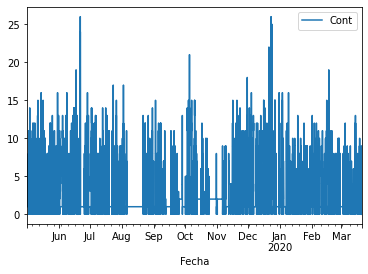

In [ ]:
#Quitar fechas ruido
fechas = basetorch.index.to_series()
basetorch = basetorch[(fechas>'2019-05-01')]
basetorch[['Cont']].plot()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class REDTORCH(nn.Module):
    def __init__(self, inputs, hidden, outputs):
        super(REDTORCH, self).__init__()
        self.linear1 = nn.Linear(inputs, hidden)
        self.linear2 = nn.Linear(hidden, outputs)

    def forward(self, x):
        h_linear = self.linear1(x)
        y_pred = self.linear2(h_linear)
        return F.relu(y_pred)

In [ ]:
modeloto=REDTORCH(5,16,1)

In [ ]:
maximoclima = basetorch['Valor'].max()
basetorch['Valor']=basetorch['Valor']/maximoclima
maximoC = basetorch['Cont'].max()
basetorch['Cont']=basetorch['Cont']/maximoC
basetorch['Predict']=basetorch['Predict']/maximoC
basetorch['diasem']=basetorch['diasem']/7
basetorch['Festivo']=basetorch['Festivo']/1
basetorch['hora']=basetorch['hora']/24
basetorch.head()

,Cont,diasem,Festivo,Valor,hora,Predict
Fecha,,,,,,
2019-05-01 00:01:00,0.038462,0.285714,1.0,0.5,0.0,0.038462
2019-05-01 00:02:00,0.038462,0.285714,1.0,0.5,0.0,0.038462
2019-05-01 00:03:00,0.038462,0.285714,1.0,0.5,0.0,0.038462
2019-05-01 00:04:00,0.038462,0.285714,1.0,0.5,0.0,0.038462
2019-05-01 00:05:00,0.038462,0.285714,1.0,0.5,0.0,0.038462


In [ ]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(modeloto.parameters(), lr=0.01)

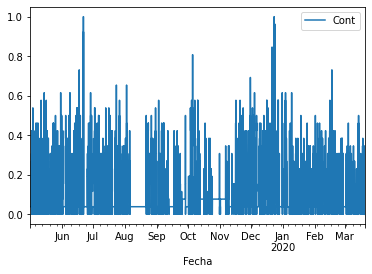

In [ ]:
basetorch[['Cont']].plot()

In [ ]:
entrada = basetorch[['Cont','diasem','Festivo','Valor','hora']].values
salida = basetorch[['Predict']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(entrada, salida, test_size=0.33)
X_train=torch.from_numpy(X_train).type(torch.float)
y_train=torch.from_numpy(y_train).type(torch.float)
X_test=torch.from_numpy(X_test).type(torch.float)
y_test=torch.from_numpy(y_test).type(torch.float)

In [ ]:
for  i  in range (1000):
  modeloto.zero_grad()
  pred = modeloto(X_train)
  loss = criterion(pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

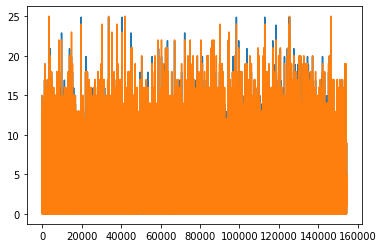

In [ ]:
predichos = modeloto(X_test)
plt.plot(predichos.detach().numpy()*maximoC)
plt.plot(y_test.detach().numpy()*maximoC)


In [ ]:
np.sqrt(np.power(predichos.detach().numpy()-y_test.detach().numpy(),2).mean())*maximoC

0.23093866184353828

Modelo Torch #2 fecha ant

In [ ]:
basetorch2 = base.copy()
basetorch2['Predict']=np.nan
basetorch2['Predict'][:-3600] = basetorch2['Cont'][3600:]
basetorch=basetorch2[:-3600]
basetorch2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cont,diasem,Festivo,Valor,hora,Predict
Fecha,,,,,,
2018-11-01 07:46:00,1.0,3,0,0,7,1.0
2018-11-01 07:47:00,2.0,3,0,0,7,1.0
2018-11-01 07:48:00,2.0,3,0,0,7,1.0
2018-11-01 07:49:00,4.0,3,0,0,7,1.0
2018-11-01 07:50:00,4.0,3,0,0,7,1.0


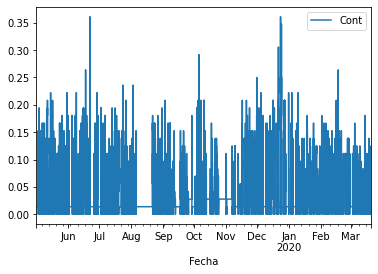

In [ ]:
#Quitar fechas ruido
fechas = basetorch2.index.to_series()
basetorch2 = basetorch2[(fechas>'2019-05-01')]
basetorch2[['Cont']].plot()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class REDTORCH(nn.Module):
    def __init__(self, inputs, hidden, outputs):
        super(REDTORCH, self).__init__()
        self.linear1 = nn.Linear(inputs, hidden)
        self.linear2 = nn.Linear(hidden, outputs)

    def forward(self, x):
        h_linear = self.linear1(x)
        y_pred = self.linear2(h_linear)
        return F.relu(y_pred)

In [ ]:
modeloto=REDTORCH(5,16,1)

In [ ]:
maximoclima = basetorch2['Valor'].max()
basetorch2['Valor']=basetorch2['Valor']/maximoclima
maximoC = basetorch2['Cont'].max()
basetorch2['Cont']=basetorch2['Cont']/maximoC
basetorch2['Predict']=basetorch2['Predict']/maximoC
basetorch2['diasem']=basetorch2['diasem']/7
basetorch2['Festivo']=basetorch2['Festivo']/1
basetorch2['hora']=basetorch2['hora']/24
basetorch2.head()

,Cont,diasem,Festivo,Valor,hora,Predict
Fecha,,,,,,
2018-11-01 07:46:00,0.013889,0.428571,0.0,0.0,0.291667,0.013889
2018-11-01 07:47:00,0.027778,0.428571,0.0,0.0,0.291667,0.013889
2018-11-01 07:48:00,0.027778,0.428571,0.0,0.0,0.291667,0.013889
2018-11-01 07:49:00,0.055556,0.428571,0.0,0.0,0.291667,0.013889
2018-11-01 07:50:00,0.055556,0.428571,0.0,0.0,0.291667,0.013889


In [ ]:
entrada = basetorch2[['Cont','diasem','Festivo','Valor','hora']].values
salida = basetorch2[['Predict']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(entrada, salida, test_size=0.33)
X_train=torch.from_numpy(X_train).type(torch.float)
y_train=torch.from_numpy(y_train).type(torch.float)
X_test=torch.from_numpy(X_test).type(torch.float)
y_test=torch.from_numpy(y_test).type(torch.float)

In [ ]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(modeloto.parameters(), lr=0.01)

In [ ]:
for  i  in range (1000):
  modeloto.zero_grad()
  pred = modeloto(X_train)
  loss = criterion(pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

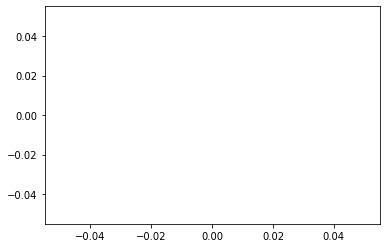

In [ ]:
predichos = modeloto(X_test)
plt.plot(predichos.detach().numpy()*maximoC)
#plt.plot(y_test.detach().numpy()*maximoC)

In [ ]:
np.sqrt(np.power(predichos.detach().numpy()-y_test.detach().numpy(),2).mean())*maximoC

nan

#Codigo ciclo por celdas

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 9.4MB/s 
     |████████████████████████████████| 2.1MB 40.6MB/s 
     |████████████████████████████████| 9.5MB 40.4MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)
import datetime as dt
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import logging
import numpy as np
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For Arima
import pmdarima
import statsmodels.tsa.api as smt
## For Lstm
from tensorflow.keras import models, layers, preprocessing as kprocessing
## For Prophet
from fbprophet import Prophet
# For errors
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


2.3.0


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cargue = pd.read_csv("/content/drive/My Drive/colab bases/Consolidado General 11_2018-06_2020.csv",encoding='latin1', delimiter=';')
#df = pd.cargue({
    #'Codigo Zona': ['DOMICILIO/CARGUE']})
cargue['Codigo Zona'] =np.where((cargue['Codigo Zona']== 'DOMICILIOS/CARGUE'),'DOMICILIOS_CARGUE',cargue['Codigo Zona'])
cargue.head(15)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12,14) have mixed types.Specify dtype option on import or set low_memory=False.



,Id Registro,Operador ingreso,Operador salida,Codigo Zona,Placa,Tipo vehículo,Fecha ingreso,Hora ingreso,Fecha salida,Hora salida,Impulsador TR,Fecha TR,Total minutos,Valor,Num. Factura,Tarifa,Estado factura
0,5810628,EDER ECHEVERRY GALEANO,EDER ECHEVERRY GALEANO,EL ABUELO Y SON & SORBO,EHL999,Automoviles,2018-11-01 07:01:53,07:01:53,2018-11-01 07:14:47,07:14:47,NaN,NaN,0h 12m 54s,800,NaN,CARRO ZER CALDAS,Tiquete pago
1,5810635,EDER ECHEVERRY GALEANO,EDER ECHEVERRY GALEANO,EL ABUELO Y SON & SORBO,FCY730,Automoviles,2018-11-01 07:02:23,07:02:23,2018-11-01 18:25:24,18:25:24,NaN,NaN,11h 23m 1s,36800,NaN,CARRO ZER CALDAS,Tiquete pago
2,5822823,EDER ECHEVERRY GALEANO,EDER ECHEVERRY GALEANO,EL ABUELO Y SON & SORBO,HNV201,Automoviles,2018-11-01 07:35:28,07:35:28,2018-11-01 18:49:40,18:49:40,NaN,NaN,11h 14m 12s,36000,NaN,CARRO ZER CALDAS,Tiquete pago
3,5811677,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,WUX03C,Motos,2018-11-01 07:46:34,07:46:34,2018-11-01 12:12:11,12:12:11,NaN,NaN,4h 25m 37s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
4,5811679,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,ZHA49A,Motos,2018-11-01 07:48:15,07:48:15,2018-11-01 20:58:34,20:58:34,NaN,NaN,13h 10m 19s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
5,5811680,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,HBG80D,Motos,2018-11-01 07:51:18,07:51:18,2018-11-01 20:58:09,20:58:09,NaN,NaN,13h 6m 51s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
6,5811678,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,MBG26C,Motos,2018-11-01 07:51:58,07:51:58,2018-11-01 12:17:22,12:17:22,NaN,NaN,4h 25m 24s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
7,5811681,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,PIX35E,Motos,2018-11-01 07:52:37,07:52:37,2018-11-01 20:58:23,20:58:23,NaN,NaN,13h 5m 46s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
8,5811682,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,KHG98E,Motos,2018-11-01 07:53:17,07:53:17,2018-11-01 10:31:02,10:31:02,NaN,NaN,2h 37m 45s,2750,NaN,MOTOS ZER CALDAS,Tiquete pago
9,5811683,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,WBF47C,Motos,2018-11-01 07:53:50,07:53:50,2018-11-01 20:57:57,20:57:57,NaN,NaN,13h 4m 7s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago


In [ ]:
def CargarDatos(estacion, vehiculo):
  dtf = cargue
  dtf=dtf[dtf['Codigo Zona']==estacion]
  dtf=dtf[dtf['Tipo vehículo']==vehiculo]
  dtf=dtf[['Fecha ingreso','Fecha salida']]
  dtf["Fecha ingreso"] = pd.to_datetime(dtf['Fecha ingreso'], format='%Y-%m-%d %H:%M:%S')
  dtf["Fecha salida"] = pd.to_datetime(dtf['Fecha salida'], format='%Y-%m-%d %H:%M:%S')
  dtfI=pd.DataFrame()
  dtfI['Fecha']=dtf['Fecha ingreso']
  dtfI['conteo']=1
  dtfI.set_index('Fecha',inplace=True)
  dtfI.head()
  dtfS=pd.DataFrame()
  dtfS['Fecha']=dtf['Fecha salida']
  dtfS['conteo']=-1
  dtfS.set_index('Fecha',inplace=True)
  dt=pd.concat([dtfI,dtfS])
  dt.sort_index(inplace=True)
  dt['Cont']=dt['conteo'].cumsum()
  dt=dt[['Cont']]
  dt = dt[(dt.index.to_series()>'2020-01-15')]
  dt = dt.resample('T').last().bfill()
  dt.reset_index(inplace=True)
  df_pr = dt.copy()
  return dt


In [ ]:
def ObtenerEstaciones():
  dtf = pd.read_csv("/content/drive/My Drive/colab bases/Consolidado General 11_2018-06_2020.csv", encoding='latin1', delimiter=';')
  return set(dtf["Codigo Zona"])


In [ ]:
def PredecirConProphet(df_pr):
  m = Prophet()
  #m.add_country_holidays(country_name='CO')
  m.fit(train_data_pr)  
  future = m.make_future_dataframe(periods=7000,freq='min')
  prophet_pred = m.predict(future)
  prophet_pred = pd.DataFrame({"Date" : prophet_pred[-7000:]['ds'], "Pred" : prophet_pred[-7000:]["yhat"]})
  prophet_pred = prophet_pred.set_index("Date")
  prophet_pred.index.freq = "min"
  return prophet_pred

In [ ]:
def CalcularRMSEProphet(test_data, prophet_pred):
  prophet_rmse_error = rmse(test_data['y'], prophet_pred['Pred'].values)
  # prophet_mse_error = prophet_rmse_error**2
  return prophet_rmse_error

In [ ]:
resultados = dict()
for estacion in ObtenerEstaciones():
  if estacion not in resultados:
    resultados[estacion] = dict()
  for vehiculo in ["Automoviles", "Motos"]:
    print(f"Corriendo estación: {estacion} vehículo {vehiculo}")
    resultados[estacion][vehiculo] = dict()
    dt = CargarDatos(estacion, vehiculo)
    dt.columns = ['ds','y'] # To use prophet column names should be like that
    dt = dt[dt['y'].notnull()].copy()
    print("Datos cargados")
    if dt.empty or dt.shape[0] < 2:
      continue
    # Probar con datos de prueba
    train_data_pr = dt.iloc[:len(dt)-7000]
    test_data_pr = dt.iloc[len(dt)-7000:]
    print("Entrenando con datos de pruebas...")
    try:
      prop_pred_train = PredecirConProphet(train_data_pr)
    except:
      continue
    prophet_rmse_error = CalcularRMSEProphet(test_data_pr, prop_pred_train)
    resultados[estacion][vehiculo]["Prophet_prueba_RMS"] = prophet_rmse_error
    print(f"Error con entrenamiento {prophet_rmse_error}")

    # Prediccion futura
    print("Entrenando con todos los datos de pruebas...")
    m = Prophet()
    m.fit(dt)  
    future = m.make_future_dataframe(periods=7000,freq='min')
    print("Prediciendo futuros...")
    prophet_pred = m.predict(future)
    print("Guardando archivo de predicciones")
    #tomar solo las siguientes predicciones
    prophet_pred[-7000:].to_excel(f"/content/drive/My Drive/colab bases/{estacion}_{vehiculo}_prophet.xlsx")
resultados = pd.DataFrame(resultados)
resultados.to_excel(f"/content/drive/My Drive/colab bases/resultados_prhopet.xlsx")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning:

Columns (12,14) have mixed types.Specify dtype option on import or set low_memory=False.



Corriendo estación: EDIF. LATINO vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.4395379989963455
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Corriendo estación: EDIF. LATINO vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.517648787736812
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: LA ESTACION vehículo Automoviles
Datos cargados
Corriendo estación: LA ESTACION vehículo Motos
Datos cargados
Corriendo estación: NOTARIA UNICA vehículo Automoviles
Datos cargados
Corriendo estación: NOTARIA UNICA vehículo Motos
Datos cargados
Corriendo estación: CASA DE LA CULTURA vehículo Automoviles


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.2702112391089802
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: CASA DE LA CULTURA vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.5721464686113337
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: DOMICILIOS/CARGUE vehículo Automoviles
Datos cargados
Corriendo estación: DOMICILIOS/CARGUE vehículo Motos
Datos cargados
Corriendo estación: PARQUE CALDAS vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.098823568973172
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: PARQUE CALDAS vehículo Motos


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 2.7880998671632318
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: OLAYA HERRERA CALDAS vehículo Automoviles
Datos cargados
Corriendo estación: OLAYA HERRERA CALDAS vehículo Motos
Datos cargados
Corriendo estación: ED. SAN FRANCISCO vehículo Automoviles
Datos cargados
Corriendo estación: ED. SAN FRANCISCO vehículo Motos
Datos cargados
Corriendo estación: ZONA PRUEBA vehículo Automoviles
Datos cargados
Corriendo estación: ZONA PRUEBA vehículo Motos
Datos cargados
Corriendo estación: TORRE OASIS vehículo Automoviles


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.5674725434610923
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Corriendo estación: TORRE OASIS vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.12172920458725321
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: CENSA vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.1498213574779645
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Corriendo estación: CENSA vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.0672802854028264
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: PACHES-CASONA vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 2.0565438505379894
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: PACHES-CASONA vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.818231663066347
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: LA CANOA vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.2996390394873625
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: LA CANOA vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.3872213223719019
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Corriendo estación: OLAYA HERRERA Y SAN FRANCISCO vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.1310261678566147
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Corriendo estación: OLAYA HERRERA Y SAN FRANCISCO vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.6376816480031139
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: MI VAQUITA vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.9699388705151148
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: MI VAQUITA vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.9918901472586896
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: EL CARRUSEL vehículo Automoviles
Datos cargados
Corriendo estación: EL CARRUSEL vehículo Motos
Datos cargados
Corriendo estación: OPTICA BOSTON vehículo Automoviles
Datos cargados
Corriendo estación: OPTICA BOSTON vehículo Motos
Datos cargados
Corriendo estación: CASA DE LA CULTURA 2 vehículo Automoviles


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.0538309768662946
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Corriendo estación: CASA DE LA CULTURA 2 vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.6286449442657754
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: FULLHOGAR vehículo Automoviles


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.8905331101227323
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: FULLHOGAR vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.523024475452838
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: EL ABUELO Y SON & SORBO vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.2084057384593632
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: EL ABUELO Y SON & SORBO vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.4629954700330744
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


In [ ]:
import os

directorio = "/content/drive/My Drive/colab bases/"
datos = []
for archivo in os.listdir("/content/drive/My Drive/colab bases/"):
  if "Copia" in archivo:
    continue
  if "resultados" in archivo:
    continue
  if "_prophet.xlsx" not in archivo:
    continue
  df = pd.read_excel(os.path.join(directorio, archivo))
  estacion, vehiculo, _ = archivo.split("_")
  df = df[["ds", "trend"]]
  df["estacion"] = estacion
  df["vehiculo"] = vehiculo
  datos.append(df)
df = pd.concat(datos)
df.to_excel(os.path.join(directorio, "consolidado_prophet_total.xlsx"))
